# Greenland: read a shapefile and display with cartopy

## General context
This serie of notebooks presents the results of preliminary activities to a scientific study to be conducted for CNES (French spatial agency)
with the collaboration of Météo France.<br> 
The study is focusing on the observation of Greenland using specific instruments (microwave radiometers) on-board satellite missions.<br>
The preliminary activities consist on preparation of data handling and data representation.<br>

## Objective of the notebook
First, I needed to to send a shapefile to one of my collegue. <br>
The goal was to help her with the extraction of weather data, limited to the region of interest.<br>
I wanted to check this shapefile.<br>
The objective of this first notebook is simply to display a shapefile on a cartopy map

## References

- the shapefile<br>

Hijmans, Robert J.. University of California, Berkeley. Museum of Vertebrate Zoology. Boundary, Greenland, 2015.
University of California, Berkeley. Museum of Vertebrate Zoology. 

https://maps.princeton.edu/catalog/stanford-sd368wz2435



## The script

Classical libraries are loaded and the reader available from cartopy as well.

In [39]:
import matplotlib
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader as creader

In [44]:
matplotlib.rcParams['figure.figsize'] =  (15, 10)

matplotlib.rcParams['font.size'] =  16

matplotlib.rcParams['axes.titlesize'] =  30

matplotlib.rcParams['axes.labelsize'] =  'x-large'
matplotlib.rcParams['xtick.labelsize'] =  'x-large'
matplotlib.rcParams['ytick.labelsize'] =  'x-large'

matplotlib.rcParams['xtick.major.size'] =  8
matplotlib.rcParams['xtick.minor.size'] =  5
matplotlib.rcParams['ytick.major.size'] =  8
matplotlib.rcParams['ytick.minor.size'] =  5

matplotlib.rcParams['lines.linewidth'] =  5

matplotlib.rcParams['legend.fontsize'] =  'x-large'
matplotlib.rcParams['legend.frameon'] =  False

matplotlib.rcParams['mathtext.default'] =  'regular'

matplotlib.rcParams['axes.edgecolor'] =  'white'
matplotlib.rcParams['axes.grid'] =  True
matplotlib.rcParams['grid.color'] =  'white'
matplotlib.rcParams['grid.linestyle'] =  '-'
matplotlib.rcParams['grid.linewidth'] =  2
matplotlib.rcParams['axes.facecolor'] =  'E9E9F1' 

In [45]:
resolution = '10m'
title = 'Greenland\nadd shapefile with cartopy'

The first lines below create the map associated with the LambertAzimuthalEqualArea.
This projection is particularly well suited for high latitudes since it conserves the area.

The two last lines display the shapefile. <br>
The shapefile is loaded using cartopy interface. <br>
It is then added to the figure using the add_geometries method. <br>
Note that since the shapefile has a high resolution, it takes about 20s for the figure to be displayed.

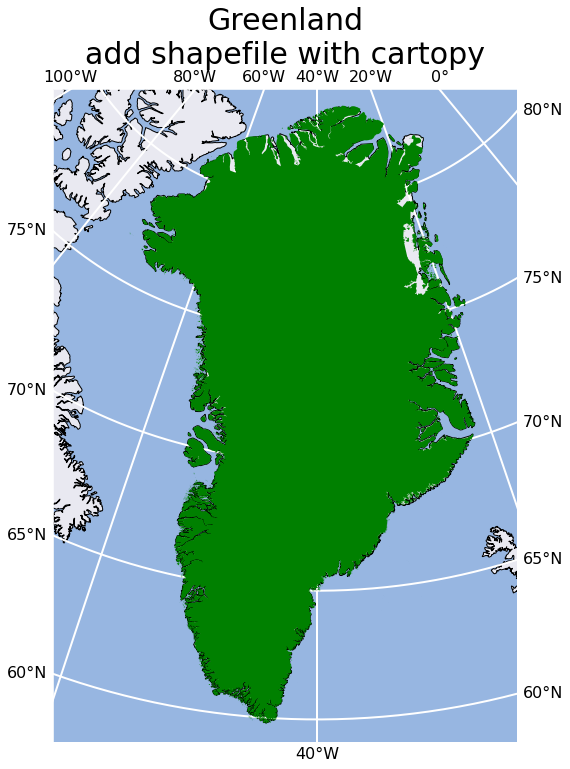

In [46]:
# init projection
proj = ccrs.LambertAzimuthalEqualArea(central_longitude=-40,central_latitude=+75)
# init figure
fig = plt.figure(figsize=(20,12))   
ax = fig.add_subplot(1,1,1,projection=proj)
# set extent
extent = [300,335,59,84]
ax.set_extent(extent, ccrs.PlateCarree())
# ocean
feature = cfeature.NaturalEarthFeature(category='physical', name='ocean', scale=resolution,
                                    edgecolor='none',   
                                    facecolor=cfeature.COLORS['water'],zorder=1)    
ax.add_feature(feature)
# coastlines
ax.coastlines(resolution=resolution)
# grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,zorder=2)
# title
ax.set_title(title)
shp = creader('files/sd368wz2435.shp')
ax.add_geometries(shp.geometries(),ccrs.PlateCarree(), facecolor='green',zorder=4)
plt.show()